# Homework 4

For this assignment, you will be developing an artificial neural network to classify data given in the __[Dry Beans Data Set](https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset#)__. This data set was obtained as a part of a research study by Selcuk University, Turkey, in which a computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features. More details on the study can be found in the following __[research paper](https://www.sciencedirect.com/science/article/pii/S0168169919311573)__. <br>
### **Make sure to use the lecture notebook on an introduction to keras and cross validation located [here](https://colab.research.google.com/drive/1ksEGL7SJ_wutCIyPYx7Loe5EPdOij6dJ?usp=sharing) and [here](https://colab.research.google.com/drive/1C9Mwf1J2ril1Q4l6n2BjQMb8YaFySG5_?usp=sharing)**.

## About the Data Set
Seven different types of dry beans were used in a study in Selcuk University, Turkey, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the **classification** model, images of 13611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features - 12 dimensions and 4 shape forms - were obtained from the grains.

Number of Instances (records in the data set): __13611__

Number of Attributes (fields within each record, including the class): __17__

### Data Set Attribute Information:

1. __Area (A)__ : The area of a bean zone and the number of pixels within its boundaries.
2. __Perimeter (P)__ : Bean circumference is defined as the length of its border.
3. __Major axis length (L)__ : The distance between the ends of the longest line that can be drawn from a bean.
4. __Minor axis length (l)__ : The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5. __Aspect ratio (K)__ : Defines the relationship between L and l.
6. __Eccentricity (Ec)__ : Eccentricity of the ellipse having the same moments as the region.
7. __Convex area (C)__ : Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8. __Equivalent diameter (Ed)__ : The diameter of a circle having the same area as a bean seed area.
9. __Extent (Ex)__ : The ratio of the pixels in the bounding box to the bean area.
10. __Solidity (S)__ : Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11. __Roundness (R)__ : Calculated with the following formula: (4piA)/(P^2)
12. __Compactness (CO)__ : Measures the roundness of an object: Ed/L
13. __ShapeFactor1 (SF1)__
14. __ShapeFactor2 (SF2)__
15. __ShapeFactor3 (SF3)__
16. __ShapeFactor4 (SF4)__

17. __Classes : *Seker, Barbunya, Bombay, Cali, Dermosan, Horoz, Sira*__

### Libraries that can be used :
- NumPy, SciPy, Pandas, Sci-Kit Learn, TensorFlow, Keras. You may also use PyTorch (though support may be limited)
- Any other library used during the lectures and discussion sessions.

### Other Notes
- Don't worry about not being able to achieve high accuracy, it is neither the goal nor the grading standard of this assignment.
- Discussion and Lecture materials should be helpful for doing the assignments.
- The homework submission should be a .ipynb file.


In [1]:
!git clone https://github.com/ucsd-cse151a-ss25/hw4.git

Cloning into 'hw4'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 69 (delta 40), reused 7 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (69/69), 1.58 MiB | 12.24 MiB/s, done.
Resolving deltas: 100% (40/40), done.



## Exercise 1 : Building a Feed-Forward Neural Network(50 points)

### Exercise 1.1 : Data Preprocessing (10 points)

- As the classes are categorical, use one-hot encoding to represent the set of classes. You will find this useful when developing the output layer of the neural network.
- Split the data into training and testing set by __90:10__ and use the training set for training the model and the test set to evaluate the model performance. Please set verbose=0 to suppress output during training.
- Normalize each field of the input data using the min-max normalization technique.

__Notes:__

- Splitting of the dataset should be done __before__ the normalization step and __after__ the one-hot encoding.

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [11]:
df = pd.read_csv('hw4/Dry_Beans_Dataset.csv')

X = df.drop('Class', axis=1)
y = df[['Class']]

encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.1, random_state=151)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train shape:", X_train_scaled.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test_scaled.shape)
print("y_test shape:", y_test.shape)

X_train shape: (12249, 16)
y_train shape: (12249, 7)
X_test shape: (1362, 16)
y_test shape: (1362, 7)


### Exercise 1.2 : Training and Testing the Neural Network (40 points)

Design a 3-layer (3 hidden layers and this does not include the input or output layer) artificial deep neural network, specifically a feed-forward multi-layer perceptron (using the sigmoid activation function), to classify the type of 'Dry Bean' given the other attributes in the data set, similar to the one mentioned in the paper above. Please note that this is a **multi-class classification** problem so select the right number of nodes accordingly for the input and output layers.

Consider the following hyperparameters while developing your model:

- Model type: Keras Sequential
- Make sure your input layer matches the size of your X matrix
- Number and type of hidden layers: 3 and Dense
- Number of nodes in each hidden layer: 12
- Learning rate should be 0.3
- Number of epochs should be 100
- The sigmoid function is to be used as the activation function in each layer
- Your output layer has to use a sigmoid function and the number of outputs should match the shape of your y
- Your loss function should be MSE
- Stochastic Gradient Descent should be used to minimize the error rate

**Note:** We are having you use MSE as your loss function for this model, is this a good choice? Why or why not? If not, what should you use instead in future models? Answer below

__Requirements once the model has been trained :__

- A confusion matrix for all classes, specifying the true positive, true negative, false positive, and false negative cases for each category in the class
- Since we do have OHE output (multi-class output) you will need to either reshape or argmax your outputs. Make sure they have already been thresholded as well i.e. look at yhat and do you see 1's and 0's?
- The accuracy and mean squared error (MSE) of the model
- The precision and recall for each label in the class

__Notes :__

- The mean squared error (MSE) values obtained __should be positive__.


MSE is not a good loss function for a multi-class classification model since a discrete value is being predicted, not continuous. MSE calculates the squared differences between predicted probs and the ground truth. Cross entropy loss would be a better choice for a categorical model since the loss function measures the difference between the two probability distributions.

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, precision_recall_fscore_support
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [13]:
model = keras.Sequential([
    keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(12, activation='sigmoid'),
    keras.layers.Dense(12, activation='sigmoid'),
    keras.layers.Dense(12, activation='sigmoid'),
    keras.layers.Dense(y_train.shape[1], activation='sigmoid')
])

sgd = tf.keras.optimizers.SGD(learning_rate=0.3)
model.compile(optimizer=sgd, loss='mean_squared_error', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=100, verbose=0)

y_pred_onehot = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_onehot, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred))
print(f"Accuracy: {accuracy_score(y_test_labels, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_onehot)}")

precision, recall, _, _ = precision_recall_fscore_support(y_test_labels, y_pred, average=None, zero_division=0)
class_names = encoder.categories_[0]

for i, class_name in enumerate(class_names):
    print(f"Class: {class_name}")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print("\n")

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix:
[[ 34   0  67   0   3  11   5]
 [ 42   0   2   0   0   0   0]
 [  4   0 148   0   6   0   1]
 [  0   0   0 338   0   7   3]
 [  0   0   2   1 200   0   0]
 [  0   0   0   4   0 199   1]
 [  0   0   1  64  17  13 189]]
Accuracy: 0.8135095447870778
MSE: 0.05184947742856416
Class: BARBUNYA
Precision: 0.425
Recall: 0.2833333333333333


Class: BOMBAY
Precision: 0.0
Recall: 0.0


Class: CALI
Precision: 0.6727272727272727
Recall: 0.9308176100628931


Class: DERMASON
Precision: 0.8304668304668305
Recall: 0.9712643678160919


Class: HOROZ
Precision: 0.8849557522123894
Recall: 0.9852216748768473


Class: SEKER
Precision: 0.8652173913043478
Recall: 0.9754901960784313


Class: SIRA
Precision: 0.949748743718593
Recall: 0.6654929577464789




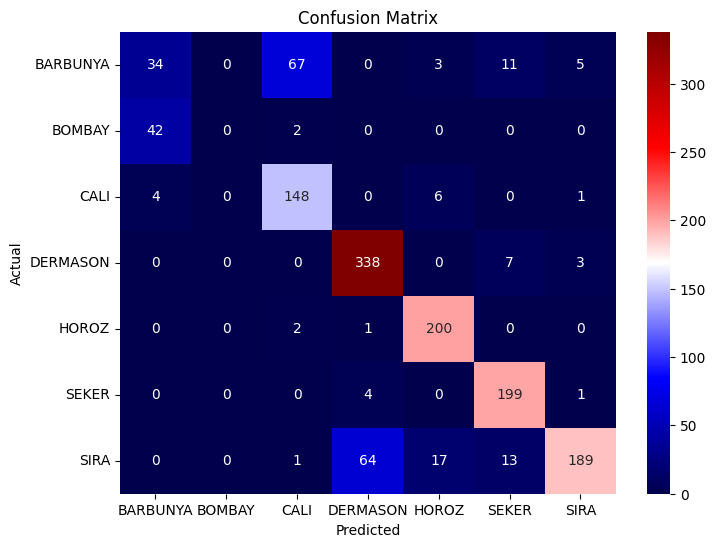

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test_labels, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="seismic",
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Exercise 2 : k-fold Cross Validation (20 points)

In order to avoid **using biased models**, use 10-fold cross validation to generalize the model from Ex1.2 on the given data set. You can choose a n_repeats value of 1-5

__Requirements :__
- Print the accuracy values during each iteration of the **cross validation** not the iterations per epoch or the epochs
- Print the overall average accuracy per each n_fold value, look at the documentation for the scoring parameter



In [26]:
from sklearn.metrics import accuracy_score

def create_model():
    model = keras.Sequential([
        keras.layers.Input(shape=(X.shape[1],)),
        keras.layers.Dense(12, activation='sigmoid'),
        keras.layers.Dense(12, activation='sigmoid'),
        keras.layers.Dense(12, activation='sigmoid'),
        keras.layers.Dense(y_onehot.shape[1], activation='sigmoid')
    ])
    sgd = tf.keras.optimizers.SGD(learning_rate=0.3)
    model.compile(optimizer=sgd, loss='mean_squared_error', metrics=['accuracy'])
    return model

In [27]:
from sklearn.model_selection import KFold

n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=151)
accuracies = []

print(f"{n_splits}-fold Cross Validation")
print("--------------------------------")

for i, (train_index, test_index) in enumerate(kf.split(X_train_scaled)):
    X_train_fold, X_test_fold = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    scaler_fold = MinMaxScaler()
    X_train_fold_scaled = scaler_fold.fit_transform(X_train_fold)
    X_test_fold_scaled = scaler_fold.transform(X_test_fold)

    model = create_model()
    model.fit(X_train_fold_scaled, y_train_fold, epochs=100, verbose=0)

    y_pred_onehot = model.predict(X_test_fold_scaled)
    y_pred = np.argmax(y_pred_onehot, axis=1)
    y_test_labels = np.argmax(y_test_fold, axis=1)

    accuracy = accuracy_score(y_test_labels, y_pred)
    accuracies.append(accuracy)
    print(f"Fold {i+1} Accuracy: {accuracy}")

average_accuracy = np.mean(accuracies)
print(f"Average Accuracy: {average_accuracy}")

10-fold Cross Validation
--------------------------------
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Fold 1 Accuracy: 0.45387755102040817
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Fold 2 Accuracy: 0.6824489795918367
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Fold 3 Accuracy: 0.6326530612244898
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Fold 4 Accuracy: 0.5551020408163265
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Fold 5 Accuracy: 0.5077551020408163
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Fold 6 Accuracy: 0.5640816326530612
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Fold 7 Accuracy: 0.45224489795918366
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Fold 8 Accuracy: 0.5485714285714286
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Fold 9 Accuracy: 0.5787755102040816
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Fold 10 Accuracy: 0.2636734693877551
Average Accuracy: 0.5239183673469389


## Exercise 3 : Hyperparameter Tuning (25 points)

Use either grid search or random search methodology to find the optimal number of nodes required in each hidden layer, as well as the optimal learning rate and the different activation functions or optimization approaches, [keras_tuner examples](https://keras.io/guides/keras_tuner/getting_started/) such that the accuracy of the model is maximum for the given data set.

__Requirements :__
- The set of optimal hyperparameters
- Try your best to maximize accuracy using this set of optimal hyperparameters

__Note :__ Hyperparameter tuning takes a lot of time to execute. Make sure that you choose the appropriate number of each hyperparameter (preferably 3 of each), and that you allocate enough time to execute your code. Make sure to tune at least three parameters with three options each at a minimum, but feel free to experiment with more, just recognize that it will grow exponentially in running time

In [33]:
import keras_tuner as kt

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.1, random_state=200)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def build_model(hpmodel):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(X_train_scaled.shape[1],)))

    num_layers = hpmodel.Int('num_layers', 1, 5)
    activation = hpmodel.Choice('activation', ['relu', 'tanh', 'sigmoid'])
    for i in range(num_layers):
        units = hpmodel.Int(f'units_{i}', min_value=8, max_value=80, step=8)
        model.add(keras.layers.Dense(units=units, activation=activation))

    model.add(keras.layers.Dense(y_train.shape[1], activation='softmax'))

    lr = hpmodel.Choice('learning_rate', values=[0.1, 0.01, 0.005, 0.001, 0.0008,
        0.0005, 0.0001])
    opt_name = hpmodel.Choice('optimizer', values=['adam', 'sgd', 'rmsprop',
        'adagrad'])

    if opt_name == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    elif opt_name == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=lr)
    elif opt_name == 'adagrad':
        optimizer = tf.keras.optimizers.Adagrad(learning_rate=lr)
    else:
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=30,
    executions_per_trial=2,
    directory='keras_tuner_dir',
    project_name='dry_beans_tuning_combined'
)

X_train_hp, X_val_hp, y_train_hp, y_val_hp = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=151
)

tuner.search(X_train_hp, y_train_hp, epochs=50, validation_data=(X_val_hp,
    y_val_hp), verbose=1)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("\nOptimal Hyperparameters")
print(f"Number of layers: {best_hps.get('num_layers')}")
for i in range(best_hps.get('num_layers')):
    print(f"Units in layer {i}: {best_hps.get(f'units_{i}')}")
print(f"Activation: {best_hps.get('activation')}")
print(f"Optimizer: {best_hps.get('optimizer')}")
print(f"Learning rate: {best_hps.get('learning_rate')}")

model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train_hp, y_train_hp, epochs=100,
    validation_data=(X_val_hp, y_val_hp), verbose=0)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print(f"Best epoch: {best_epoch}")

hypermodel = tuner.hypermodel.build(best_hps)
hypermodel.fit(X_train_scaled, y_train, epochs=best_epoch, verbose=0)

test_loss, test_acc = hypermodel.evaluate(X_test_scaled, y_test, verbose=0)
print("\nFinal Model:")
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")


Trial 30 Complete [00h 01m 54s]
val_accuracy: 0.6342857182025909

Best val_accuracy So Far: 0.9363265335559845
Total elapsed time: 01h 03m 22s

Optimal Hyperparameters
Number of layers: 4
Units in layer 0: 16
Units in layer 1: 64
Units in layer 2: 40
Units in layer 3: 48
Activation: tanh
Optimizer: adam
Learning rate: 0.001
Best epoch: 88

Final Model:
Test loss: 0.21486884355545044
Test accuracy: 0.9265785813331604


## Exercise 4 - Collaborative Statement (5 points)

It is mandatory to include a Statement of Collaboration in each submission, that follows the guidelines below.
Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed.
All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments in particular, I encourage students to organize (perhaps using Piazza) to discuss the
task descriptions, requirements, possible bugs in the support code, and the relevant technical content before they
start working on it. However, you should not discuss the specific solutions, and as a guiding principle, you are
not allowed to take anything written or drawn away from these discussions (no photographs of the blackboard,
written notes, referring to Piazza, etc.). Especially after you have started working on the assignment, try to restrict
the discussion to Piazza as much as possible, so that there is no doubt as to the extent of your collaboration.

Even if you did not use any outside resources or collaborate with anyone, please state that explicitly in the space below.

Pandas, sklearn, numpy documentation (however code from discussion workbooks and lecture was used), auto code completion from colab were used, and copilot for deugging; there was no collaboration with others.